author : Ho Man Cheng
description : for training a facial type model

In [2]:
# import dataset
import pandas as pd
from util import (DATASET_PATH )
import tensorflow
from tensorflow.keras import models, layers, optimizers, callbacks, applications

from keras.callbacks import ModelCheckpoint

from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-04-14 19:09:04.081014: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-14 19:09:04.106160: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-14 19:09:04.548232: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
models_convnextv2 = models.SequentialModel(
    [
    ]
)


models_convnextv2.load_weights("hf/facebook/convnextv2/tf_model.h5")

ValueError: Layer count mismatch when loading weights from file. Model expected 0 layers, found 2 saved layers.

In [24]:


train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2,
)

test_datagen = ImageDataGenerator(
)

train_generator = train_datagen.flow_from_directory(
    directory=f"{DATASET_PATH}/face_shape/training",
    subset="training",
    target_size=(384, 384),
    class_mode="categorical",
)

validation_generator = train_datagen.flow_from_directory(
    directory=f"{DATASET_PATH}/face_shape/training",
    subset="validation",
    target_size=(384, 384),
    class_mode="categorical",
)

test_generator = test_datagen.flow_from_directory(
    directory=f"{DATASET_PATH}/face_shape/testing",
    target_size=(384, 384),
    class_mode="categorical",
)

Found 5302 images belonging to 6 classes.
Found 1323 images belonging to 6 classes.
Found 180 images belonging to 6 classes.


In [ ]:

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2,
)

test_datagen = ImageDataGenerator(
)

train_generator = train_datagen.flow_from_directory(
    directory=f"{DATASET_PATH}/face_shape/training",
    subset="training",
    target_size=(256,256),
    class_mode="categorical",
)

validation_generator = train_datagen.flow_from_directory(
    directory=f"{DATASET_PATH}/face_shape/training",
    subset="validation",
    target_size=(256,256),
    class_mode="categorical",
)

test_generator = test_datagen.flow_from_directory(
    directory=f"{DATASET_PATH}/face_shape/testing",
    target_size=(256,256),
    class_mode="categorical",
)

In [25]:



# model_base = models.Model()

In [28]:
model_base.summary()

Model: "efficientnetv2-s"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 384, 384,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 384, 384,  │          0 │ input_layer_7[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 192, 192,  │        648 │ rescaling_4[0][0] │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 192, 192,  │         96 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 192, 192,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 192, 192,  │      5,184 │ stem_activation[… │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 192, 192,  │         96 │ block1a_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 192, 192,  │          0 │ block1a_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_add (Add)   │ (None, 192, 192,  │          0 │ block1a_project_… │
│                     │ 24)               │            │ stem_activation[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 192, 192,  │      5,184 │ block1a_add[0][0] │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 192, 192,  │         96 │ block1b_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 192, 192,  │          0 │ block1b_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 192, 192,  │          0 │ block1b_project_… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 192, 192,  │          0 │ block1b_drop[0][… │
│                     │ 24)               │            │ block1a_add[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 96, 96,    │     20,736 │ block1b_add[0][0] │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 96, 96,    │        384 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 96, 96,    │          0 │ block2a_expand_b

 Total params: 21,612,360 (82.44 MB)

 Trainable params: 21,458,488 (81.86 MB)

 Non-trainable params: 153,872 (601.06 KB)

In [26]:
model_base.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["acc"],
)

filepath = "./weights/face_shape__modified.{epoch:02d}-{val_loss:.2f}.keras"

checkpoint = callbacks.ModelCheckpoint(
    filepath,
    monitor="val_loss",
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
)

In [27]:
history = model_base.fit(
    train_generator,
    steps_per_epoch=50,  # 2000 images = batch_size * steps
    epochs=250,
    validation_data=validation_generator,
    validation_steps=10,  # 1000 images = batch_size * steps
    callbacks=[checkpoint],
)

Epoch 1/250


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 6), output.shape=(None, 1000)

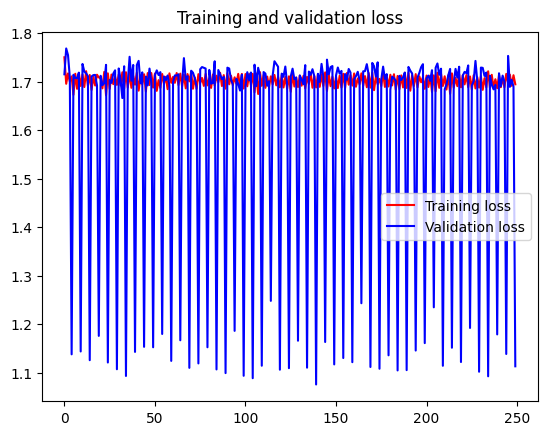

In [37]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(loss))
import matplotlib.pyplot as plt

plt.figure()

plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()